In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/geethavangala/Data-Analysis-Visualization-Covid-19-WHO-Regions/main/Covid-19-WHO-Regions.csv')
raw_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,1/22/2020,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,1/22/2020,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,1/22/2020,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,1/22/2020,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,1/22/2020,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,7/27/2020,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,7/27/2020,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,7/27/2020,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,7/27/2020,7235,60,6028,1147,Europe


In [35]:
data_df = pd.DataFrame(raw_data)
data_df.drop(data_df.columns[[0, 2, 3]], axis = 1, inplace=True)
data_df

,Country/Region,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,1/22/2020,0,0,0,0,Eastern Mediterranean
1,Albania,1/22/2020,0,0,0,0,Europe
2,Algeria,1/22/2020,0,0,0,0,Africa
3,Andorra,1/22/2020,0,0,0,0,Europe
4,Angola,1/22/2020,0,0,0,0,Africa
...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,7/27/2020,865,14,734,117,Africa
49064,Yemen,7/27/2020,1691,483,833,375,Eastern Mediterranean
49065,Comoros,7/27/2020,354,7,328,19,Africa
49066,Tajikistan,7/27/2020,7235,60,6028,1147,Europe


In [ ]:
data_df.isna().sum()

Country/Region    0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  49068 non-null  object
 1   Date            49068 non-null  object
 2   Confirmed       49068 non-null  int64 
 3   Deaths          49068 non-null  int64 
 4   Recovered       49068 non-null  int64 
 5   Active          49068 non-null  int64 
 6   WHO Region      49068 non-null  object
dtypes: int64(4), object(3)
memory usage: 2.6+ MB


In [ ]:
data_df.describe()

,Confirmed,Deaths,Recovered,Active
count,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [60]:
Active_Cases_In_Country_df = data_df.groupby(['Country/Region'])[['Active']].sum()
Active_Cases_In_Country_df.sort_values(['Active'], ascending=False, inplace=True)
Active_Cases_In_Country_df.head(10)

,Active
Country/Region,
US,156981121
Brazil,31094060
United Kingdom,22624595
Russia,19668578
India,15987913
France,10980287
Spain,9277432
Canada,8656985
Peru,7748957


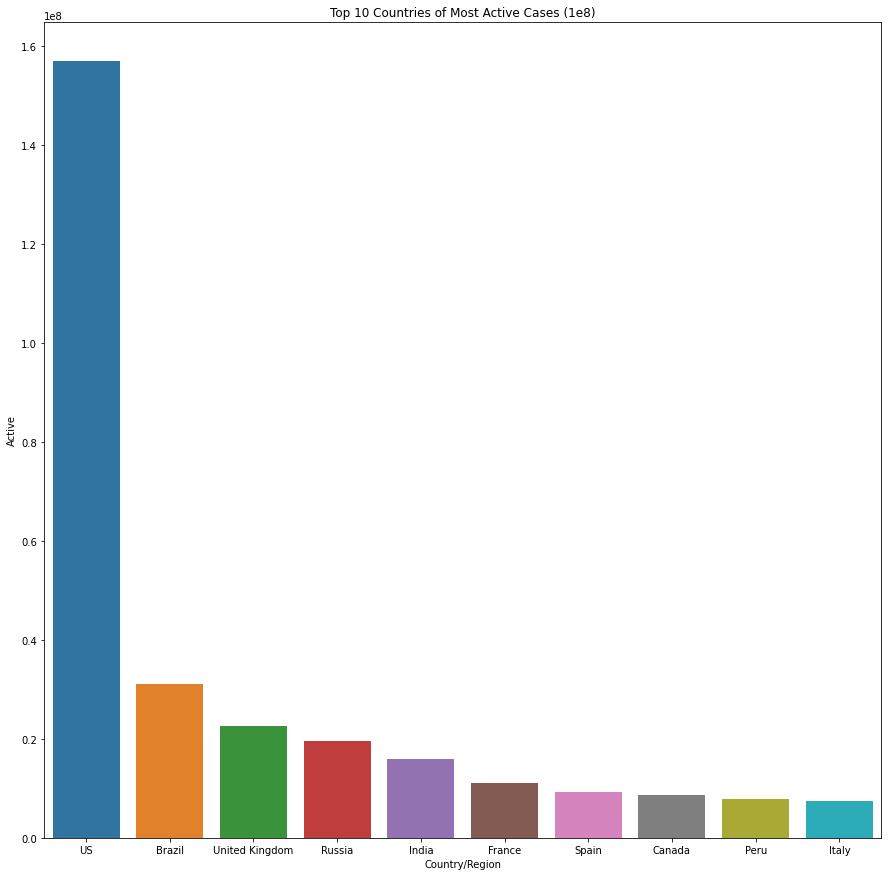

In [100]:
fig, ax = plt.subplots(figsize=(15, 15))
graph = sns.barplot(data=Active_Cases_In_Country_df.head(10), x=Active_Cases_In_Country_df.head(10).index, y="Active", ax=ax).set(title='Top 10 Countries of Most Active Cases (1e8)')

In [61]:
Deaths_Cases_In_Country_df = data_df.groupby(['Country/Region'])[['Deaths']].sum()
Deaths_Cases_In_Country_df.sort_values(['Deaths'], ascending=False, inplace=True)
Deaths_Cases_In_Country_df.head(10)

,Deaths
Country/Region,
US,11011411
United Kingdom,3997775
Brazil,3938034
Italy,3707717
France,3048524
Spain,3033030
Mexico,1728277
India,1111831
Iran,1024136


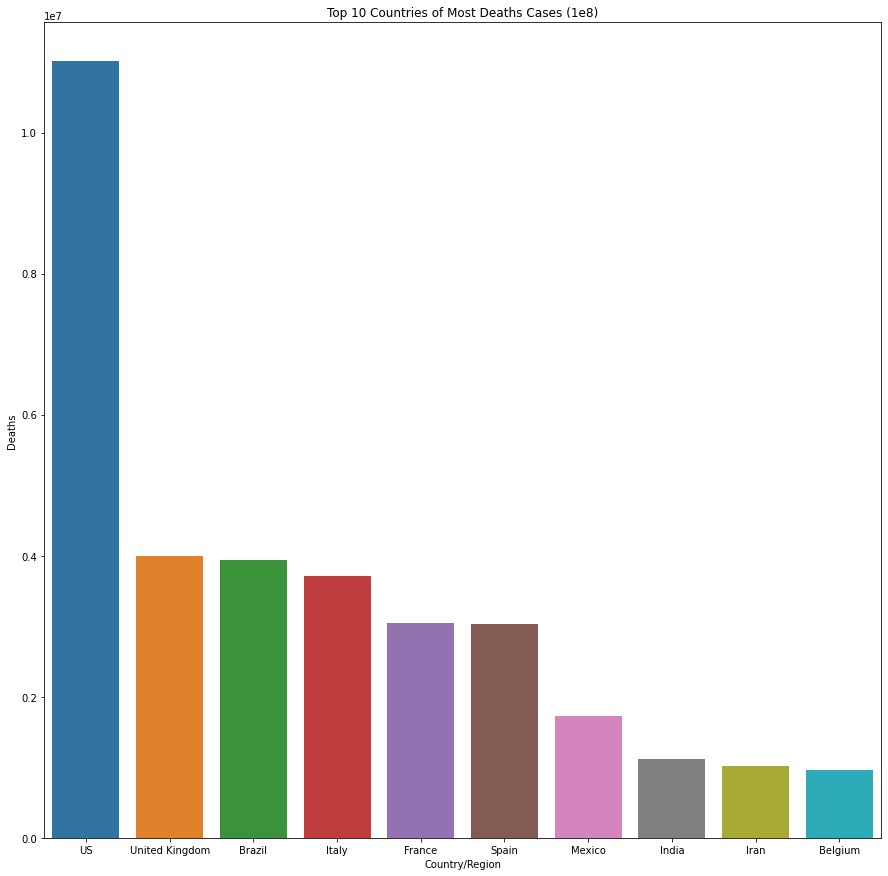

In [101]:
fig, ax = plt.subplots(figsize=(15, 15))
graph = sns.barplot(data=Deaths_Cases_In_Country_df.head(10), x=Deaths_Cases_In_Country_df.head(10).index, y="Deaths", ax=ax).set(title='Top 10 Countries of Most Deaths Cases (1e7)')

In [62]:
Recovered_Cases_In_Country_df = data_df.groupby(['Country/Region'])[['Recovered']].sum()
Recovered_Cases_In_Country_df.sort_values(['Recovered'], ascending=False, inplace=True)
Recovered_Cases_In_Country_df.head(10)

,Recovered
Country/Region,
US,56353416
Brazil,54492873
Russia,25120448
India,23783720
Germany,17107839
Italy,15673910
Iran,15200895
Spain,15093583
Turkey,13345389


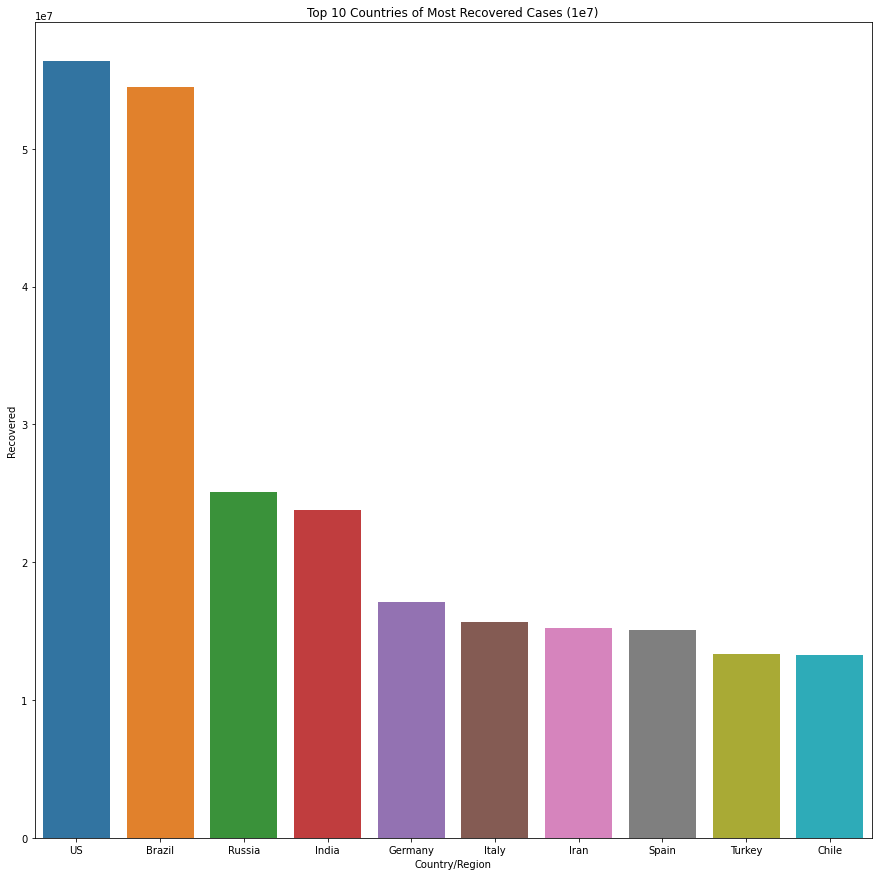

In [102]:
fig, ax = plt.subplots(figsize=(15, 15))
graph = sns.barplot(data=Recovered_Cases_In_Country_df.head(10), x=Recovered_Cases_In_Country_df.head(10).index, y="Recovered", ax=ax).set(title='Top 10 Countries of Most Recovered Cases (1e7)')